In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../quora-insincere-questions-classification/train.csv')
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [3]:
test = pd.read_csv('../quora-insincere-questions-classification/test.csv')
test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [4]:
train.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re, string

nltk.download('stopwords')
nltk.download('wordnet') 
nltk.download('omw-1.4')
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
# cleaning the data
def clean_text(text):
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    text = nopunct.split(' ')
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(text)) # remove unicode characters
    text = re.sub(r'[^a-zA-Z\s]+', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop]) # remove stop words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')]) # lemmatization
    text = re.sub(' +', ' ', text) # remove extra spaces
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fioritjx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fioritjx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fioritjx\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
from tqdm import tqdm
tqdm.pandas()
train_clean = train
train_clean['clean_text'] = train['question_text'].progress_apply(clean_text)

100%|██████████████████████████████████████████████████████████████████████| 1306122/1306122 [02:33<00:00, 8534.59it/s]


In [13]:
train_clean.head()

,qid,question_text,target,clean_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopted dog would encourage people adopt shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke used magdeburg hemisphere
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike changing ...


In [14]:
train_clean.to_csv('../quora-insincere-questions-classification/train_clean.csv')

In [2]:
# if you have already saved the cleaned strings you can start from here
train_clean = pd.read_csv('../quora-insincere-questions-classification/train_clean.csv')
train_clean.head()

,Unnamed: 0,qid,question_text,target,clean_text
0,0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation
1,1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopted dog would encourage people adopt shop
2,2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...
3,3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke used magdeburg hemisphere
4,4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike changing ...


In [3]:
from sklearn.model_selection import train_test_split
train_clean = train_clean[['clean_text','target']]
train,test = train_test_split(train_clean,train_size=.8,stratify=train_clean['target'])

In [5]:
train.head()

,clean_text,target
426381,enlightenment meme tricking people losing huma...,0
700503,get monkey pet,1
58188,someone know lyric song atomised laura welsh,0
100059,get money back deducted twice account due tech...,0
242804,according true education,0


In [6]:
train.shape

(1044897, 2)

In [4]:
X_train = train.clean_text
y_train = train.target
X_test = test.clean_text
y_test = test.target
X_train

18315       transgender cloned would clone also transgender 
1224736       le hesitant driver efficient defensive driver 
399474                          bangladesh european country 
997079                      garlic clove lost inside vagina 
1236278                     think lebron james go offseason 
                                 ...                        
82933                       make metally stronger confident 
216089     pakistan finally ready include transgenders ne...
1247259              similarity indian culture arab culture 
880728                    learn circuit designing bangalore 
287780        take father court child support raise custody 
Name: clean_text, Length: 1044897, dtype: object

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
X_train = vectorizer.fit_transform(X_train.astype('U'))
X_test = vectorizer.transform(X_test.astype('U'))

In [9]:
X_train.shape

(1044897, 149100)

In [10]:
y_train.shape

(1044897,)

In [48]:
y_train

86285      0
335650     0
51725      0
651650     0
1296821    0
          ..
364209     0
249202     1
172566     1
1249325    0
249115     0
Name: target, Length: 1044897, dtype: int64

In [50]:
# HPO on a smaller set of the training data to reduce time as 1044897 is a lot of entries
sample_size = round(X_train.shape[0]/100)
X_sample = X_train[0:sample_size]
y_sample = y_train[0:sample_size]

C:\Users\fioritjx\AppData\Local\Temp\ipykernel_13060\3735146743.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_sample = y_train[0:sample_size]


In [51]:
X_sample.shape

(10449, 149219)

In [52]:
y_sample.shape

(10449,)

In [53]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
svm = LinearSVC()
svm_cv = cross_validate(svm,X_train,y_train)

In [56]:
svm_cv['test_score'].mean()

0.9504467903747411

In [58]:
y_train[y_train==0].shape[0]/y_train.shape[0]

0.9381297869550779

In [61]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer,

l2_cv = BayesSearchCV(
                LinearSVC(),
                {
         'penalty': Categorical(['l2']),
         'loss': Categorical(['hinge','squared_hinge']),
         'C': Real(1e-6, 1e+6, prior='log-uniform'),
     },
    n_iter = 100,
    n_points = 10,
    n_jobs = -1,
    random_state = 42
)



l2_opt = l2_cv.fit(X_sample,y_sample)

C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.w

ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

In [66]:
l1_cv = BayesSearchCV(
                LinearSVC(dual=False,penalty='l1',loss='squared_hinge'),
                {
         'C': Real(1e-6, 1e+6, prior='log-uniform')
     },
    n_iter = 50,
    n_points = 10,
    n_jobs = -1,
    random_state = 42
)

l1_opt = l1_cv.fit(X_sample,y_sample)

C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\fioritjx\Anaconda3\envs\ml\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [67]:
l2_opt.best_params_

OrderedDict([('C', 0.4480542687969074),
             ('loss', 'squared_hinge'),
             ('penalty', 'l2')])

In [68]:
l2_opt.best_score_

0.9392288611340789

In [69]:
l1_opt.best_params_

OrderedDict([('C', 0.38353125401117166)])

In [70]:
l1_opt.best_score_

0.9386548358798995

In [71]:
l1_opt.best_estimator_.get_params

<bound method BaseEstimator.get_params of LinearSVC(C=0.38353125401117166, dual=False, penalty='l1')>

In [72]:
y_sample[y_train==0].shape[0]/y_sample.shape[0]

0.9352091109197053

It is a bit odd that baysian hyperparameter optimization was unable to improve on the defaults

In [74]:
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9509120489999043

In [77]:
from sklearn.model_selection import GridSearchCV
grid = {'C':(.9**np.arange(-10,10))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1)
grid_cv.fit(X_sample,y_sample)

GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([2.86797199, 2.58117479, 2.32305731, 2.09075158, 1.88167642,
       1.69350878, 1.5241579 , 1.37174211, 1.2345679 , 1.11111111,
       1.        , 0.9       , 0.81      , 0.729     , 0.6561    ,
       0.59049   , 0.531441  , 0.4782969 , 0.43046721, 0.38742049])})

In [78]:
grid_cv.best_score_

0.939515850856961

In [79]:
grid_cv.best_params_

{'C': 0.3874204890000001}

In [84]:
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation R2'] = grid_cv.cv_results_['mean_test_score']

<AxesSubplot: xlabel='C'>

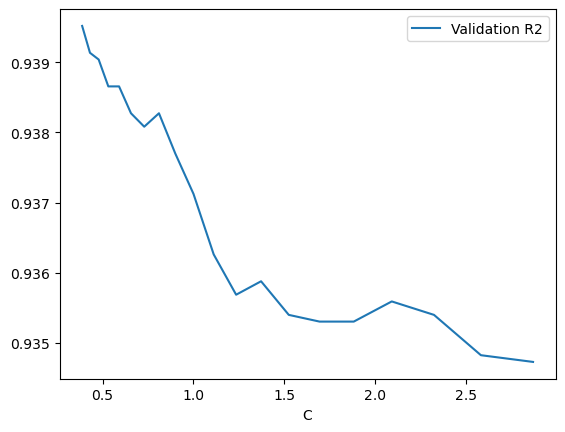

In [85]:
grid_results.plot(x='C',y='Validation R2')

In [87]:
grid = {'C':(2.0**np.arange(-20,0))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1)
grid_cv.fit(X_sample,y_sample)
grid_cv.best_score_

0.939133121545759

<AxesSubplot: xlabel='C'>

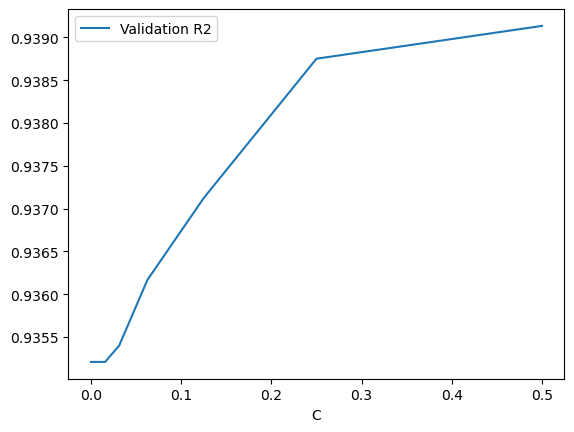

In [88]:
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation R2'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation R2')

In [89]:
grid = {'C':(np.arange(.25,1.0,.05))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1)
grid_cv.fit(X_sample,y_sample)
grid_cv.best_score_

0.9394201570770566

<AxesSubplot: xlabel='C'>

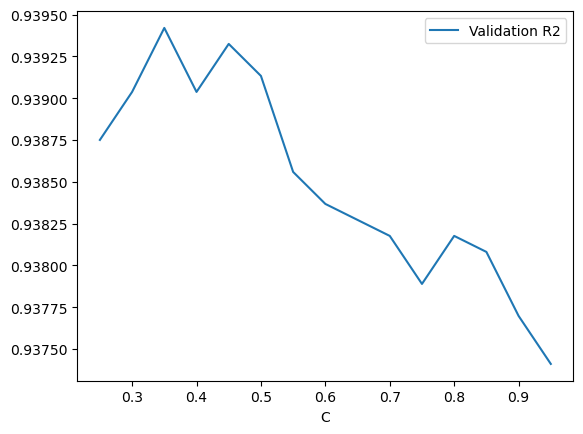

In [90]:
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation R2'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation R2')

<AxesSubplot: xlabel='C'>

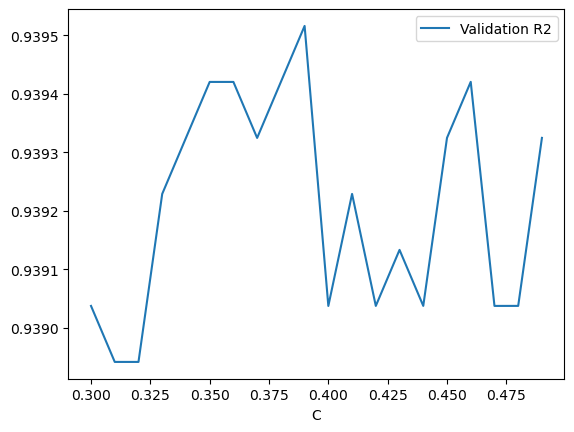

In [91]:
grid = {'C':(np.arange(.3,.5,.01))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1)
grid_cv.fit(X_sample,y_sample)
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation R2'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation R2')

In [94]:
svm_38 = LinearSVC(C=.38)
svm_38.fit(X_train,y_train)

LinearSVC(C=0.38)

In [95]:
svm_38.score(X_test,y_test)

0.9506747057134654

In [96]:
svm = LinearSVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9509120489999043

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pce = pca.explained_variance_ratio_
pce = pd.Series(pce,index=['PC-'+str(i+1) for i in range(X_train.shape[1])])
pce.head()

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [6]:
from sklearn.decomposition import TruncatedSVD
tSVD = TruncatedSVD(n_components=1000)
tSVD.fit(X_train)
exp = tSVD.explained_variance_ratio_
exp = pd.Series(exp,index=['SVD-'+str(i+1) for i in range(1000)])
exp.head()

SVD-1    0.002297
SVD-2    0.002969
SVD-3    0.002400
SVD-4    0.002233
SVD-5    0.002048
dtype: float64

In [7]:
exp.sum() #This sum is too low for me to be comfortable using - I think that trying to reduce this search space may not be beneficial in this instance

0.3972224619944192

In [8]:
Z_train = tSVD.transform(X_train)

In [10]:
Z_test = tSVD.transform(X_test)

In [6]:
def predict(classifier, X_train, y_train, X_test, y_test):
    result = []
    predict_df = pd.DataFrame()
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    predict_df = predicted

    recall = recall_score(y_test[y_test != -1], predicted[y_test != -1],
                              average="weighted")
    f1 = f1_score(y_test[y_test != -1], predicted[y_test != -1],
                      average="weighted")
    result.append([recall.mean(), f1.mean()])
    return result

In [7]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, recall_score
svm = LinearSVC()
predict(svm, X_train, y_train, X_test, y_test)

[[0.9510881424059718, 0.9450706579836832]]

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, recall_score
svm = LinearSVC(C=1) #this is the default behavior and should perform about the same as the previous cell
predict(svm, X_train, y_train, X_test, y_test)

[[0.9510881424059718, 0.9450706579836832]]

In [10]:
from sklearn.model_selection import cross_validate
svm = LinearSVC()
svm_cv = cross_validate(svm,X_train,y_train)
svm_cv['test_score'].mean()

0.9505204817149153

<AxesSubplot: xlabel='C'>

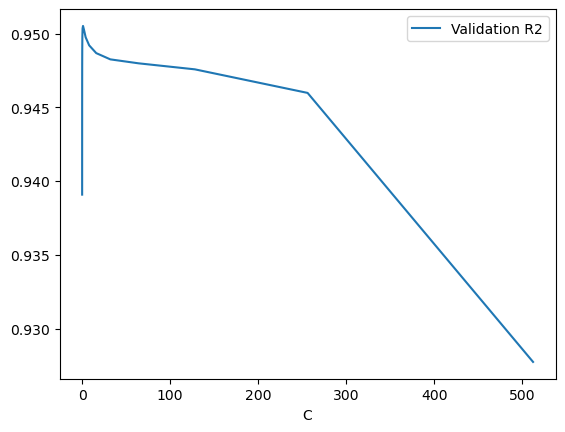

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np
grid = {'C':(2.0**np.arange(-10,10))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1)
grid_cv.fit(X_train,y_train)
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation R2'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation R2')

In [15]:
grid_results.sort_values('Validation R2', ascending = False).head()

,C,Validation R2
10,1.00,0.950521
9,0.50,0.950348
11,2.00,0.950283
8,0.25,0.949786
12,4.00,0.949748


<AxesSubplot: xlabel='C'>

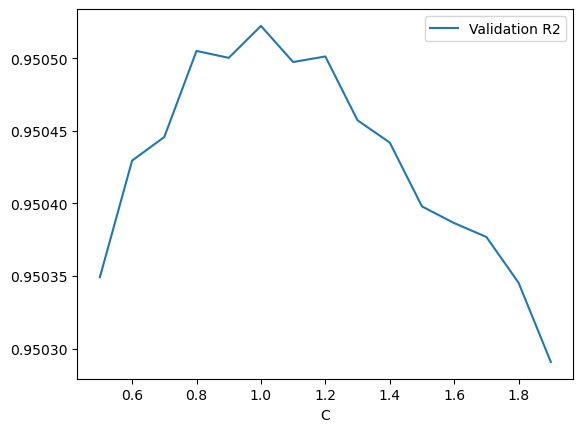

In [16]:
from sklearn.model_selection import GridSearchCV
import numpy as np
grid = {'C':(np.arange(.5,2,.1))}
grid_cv = GridSearchCV(LinearSVC(),param_grid=grid,n_jobs=-1)
grid_cv.fit(X_train,y_train)
grid_results = pd.DataFrame()
grid_results['C'] = grid['C']
grid_results['Validation R2'] = grid_cv.cv_results_['mean_test_score']
grid_results.plot(x='C',y='Validation R2')